In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
df.shape
df.size
df.head(5)
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5228,3589-PPVKW,Male,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,44.40,348.15,No
4726,2192-CKRLV,Female,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Electronic check,49.20,3580.95,No
4452,6695-AMZUF,Female,0,Yes,No,70,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),86.45,5950.2,No
1890,6770-XUAGN,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.00,21,Yes
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No


In [4]:
df.shape


(7043, 21)

In [5]:
df.size

147903

In [6]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
SeniorCitizens = df.SeniorCitizen[df.SeniorCitizen == 1].count()
print(f'The amount of Senior Citizens customers is {SeniorCitizens}')
SeniorCitizens_Ratio = round(SeniorCitizens / df.SeniorCitizen.count(),2)
print(f'The ratio of Senior Citizens is {SeniorCitizens_Ratio}' )

The amount of Senior Citizens customers is 1142
The ratio of Senior Citizens is 0.16


Text(0.93, 200, '5901')

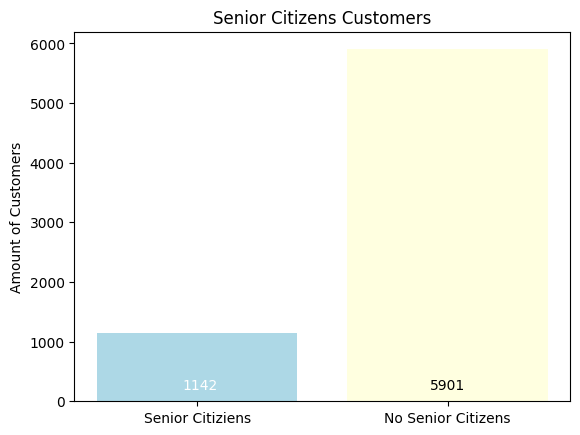

In [12]:
SeniorCitizens = df.SeniorCitizen[df.SeniorCitizen == 1].count()
NoSeniorCitizens = df.SeniorCitizen[df.SeniorCitizen == 0].count()

x_variables = ['Senior Citiziens', 'No Senior Citizens']
y_variables = [SeniorCitizens, NoSeniorCitizens]
barChar = plt.bar(x_variables,y_variables, color=['Lightblue', 'Lightyellow'])

#Set descriptions:
plt.ylabel('Amount of Customers')
plt.title('Senior Citizens Customers')
#Display values:
plt.text(-0.06, 200, SeniorCitizens, fontsize=10, color= 'White')
plt.text(0.93, 200, NoSeniorCitizens, fontsize=10, color= 'Black')

In [13]:
df_gender = df[['customerID','gender']]
df_gender = df_gender.rename(columns={'customerID':'Amount of Customers'})
gender_count = df_gender.groupby('gender').count()
gender_count['Percentage']=round((gender_count['Amount of Customers']/ df_gender['gender'].count()*100),2)
gender_count

,Amount of Customers,Percentage
gender,,
Female,3488,49.52
Male,3555,50.48


<Figure size 700x700 with 0 Axes>

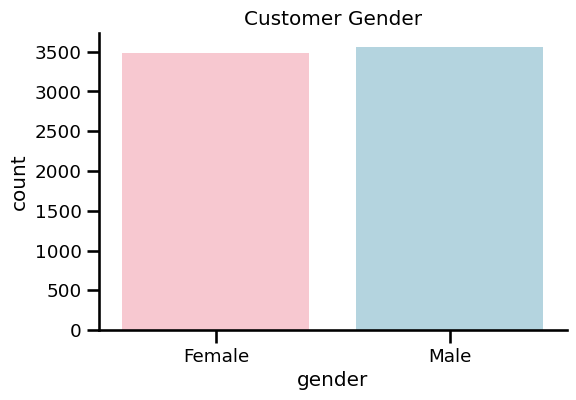

In [14]:
sns.set_palette(['pink', 'lightblue'])
sns.set_context("talk", font_scale=0.8)
plt.figure(figsize=(7,7))
gender_chart = sns.catplot(x="gender",
              hue ="gender",
                 data = df,
             kind="count",
           height=4,
           aspect=1.5).set(title = "Customer Gender")

In [15]:
GenderPartner = df[['customerID','gender','Partner']]
GenderPartner = GenderPartner.rename(columns={'customerID':'Amount of Customers'})
GenderPartner_count = GenderPartner.groupby([GenderPartner.gender, GenderPartner.Partner])[['Amount of Customers']].count()
GenderPartner_count['Percentage']=round((GenderPartner_count['Amount of Customers']/ GenderPartner['gender'].count()*100),2)
GenderPartner_count

Amount of Customers  Percentage
gender Partner                                 
Female No                      1800       25.56
       Yes                     1688       23.97
Male   No                      1841       26.14
       Yes                     1714       24.34

In [16]:
ChurnCustomers = df.Churn[df.Churn == "Yes"].count()
print(f'The amount of customers that left the company is {ChurnCustomers}')
ChurnCustomers_Ratio = round(ChurnCustomers / df.Churn.count(),2)
print(f'The churn ratio is {ChurnCustomers_Ratio}' )

The amount of customers that left the company is 1869
The churn ratio is 0.27


Text(0.93, 200, '5174')

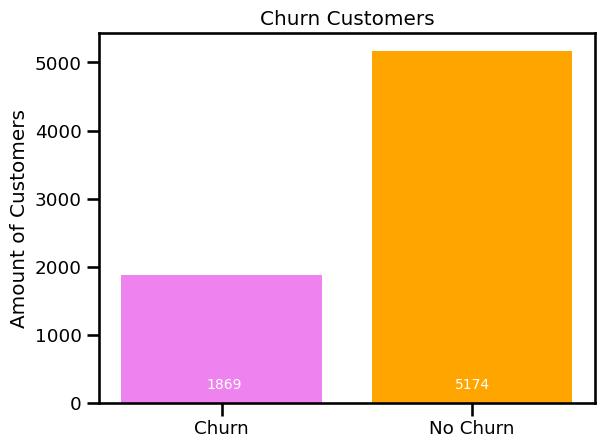

In [17]:
x_variables = ['Churn', 'No Churn']
y_variables = [df.Churn[df.Churn == "Yes"].count(), df.Churn[df.Churn == "No"].count()]
barChar = plt.bar(x_variables,y_variables, color=['violet','orange'])

#Set descriptions:
plt.ylabel('Amount of Customers')
plt.title('Churn Customers')
#Display values:
plt.text(-0.06, 200,df.Churn[df.Churn == "Yes"].count(), fontsize=10, color= 'White')
plt.text(0.93, 200, df.Churn[df.Churn == "No"].count(), fontsize=10, color= 'White')

In [18]:
TotalMonthlyCharges = df[['Churn','MonthlyCharges']]
Total = TotalMonthlyCharges.groupby('Churn').sum()
Total['Percentage']=round((Total['MonthlyCharges']/ TotalMonthlyCharges['MonthlyCharges'].sum()*100),2)
Total

,MonthlyCharges,Percentage
Churn,,
No,316985.75,69.5
Yes,139130.85,30.5


Text(0.85, 10000, '316985.75')

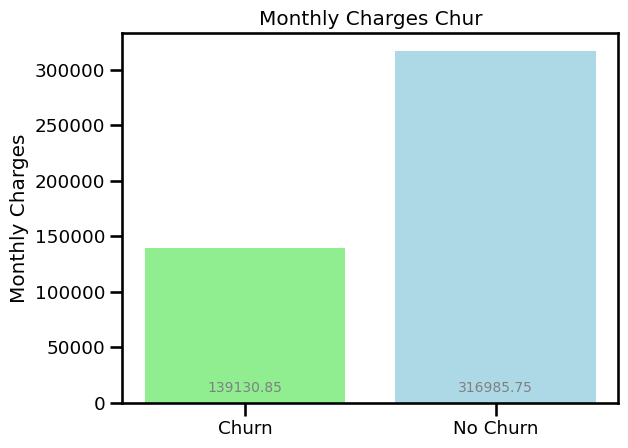

In [19]:
x_variables2 = ['Churn', 'No Churn']
y_variables2 = [TotalMonthlyCharges[TotalMonthlyCharges.Churn== 'Yes']['MonthlyCharges'].sum(), TotalMonthlyCharges[TotalMonthlyCharges.Churn== 'No']['MonthlyCharges'].sum()]
barChar2 = plt.bar(x_variables2,y_variables2, color=['lightgreen','lightblue'])

#Set descriptions:
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Chur')
#Display values:
plt.text(-0.15, 10000,TotalMonthlyCharges[TotalMonthlyCharges.Churn== 'Yes']['MonthlyCharges'].sum(), fontsize=10, color= 'Grey')
plt.text(0.85, 10000, TotalMonthlyCharges[TotalMonthlyCharges.Churn== 'No']['MonthlyCharges'].sum(), fontsize=10, color= 'Grey')

In [20]:
GenderPartner_Churn = df[['customerID','gender','Partner', 'Churn']]
GenderPartner_Churn = GenderPartner_Churn.rename(columns={'customerID':'Amount of Customers'})
GenderPartner_Churn_count = GenderPartner_Churn.groupby([GenderPartner_Churn.gender, GenderPartner_Churn.Partner, GenderPartner_Churn.Churn])[['Amount of Customers']].count()
GenderPartner_Churn_count['Percentage']=round((GenderPartner_Churn_count['Amount of Customers']/ GenderPartner['Amount of Customers'].count()*100),2)
GenderPartner_Churn_count

Amount of Customers  Percentage
gender Partner Churn                                 
Female No      No                    1180       16.75
               Yes                    620        8.80
       Yes     No                    1369       19.44
               Yes                    319        4.53
Male   No      No                    1261       17.90
               Yes                    580        8.24
       Yes     No                    1364       19.37
               Yes                    350        4.97

In [21]:
Partner_Churn1 = df[df.Partner == 'Yes'][['customerID','Partner', 'Churn']]
Partner_Churn1 = Partner_Churn1.rename(columns={'customerID':'Amount of Customers'})
Partner_Churn_count1 = Partner_Churn1.groupby([Partner_Churn1.Partner, Partner_Churn1.Churn])[['Amount of Customers']].count()
Partner_Churn_count1['Percentage']=round((Partner_Churn_count1['Amount of Customers']/ Partner_Churn1['Amount of Customers'].count()*100),2)
Partner_Churn_count1

Amount of Customers  Percentage
Partner Churn                                 
Yes     No                    2733       80.34
        Yes                    669       19.66

In [22]:
Partner_Churn2 = df[df.Partner == 'No'][['customerID','Partner', 'Churn']]
Partner_Churn2 = Partner_Churn2.rename(columns={'customerID':'Amount of Customers'})
Partner_Churn_count2 = Partner_Churn2.groupby([Partner_Churn2.Partner, Partner_Churn2.Churn])[['Amount of Customers']].count()
Partner_Churn_count2['Percentage']=round((Partner_Churn_count2['Amount of Customers']/ Partner_Churn2['Amount of Customers'].count()*100),2)
Partner_Churn_count2

Amount of Customers  Percentage
Partner Churn                                 
No      No                    2441       67.04
        Yes                   1200       32.96

In [23]:
no_numerical = (df.dtypes == 'object')
no_numerical_list = list(no_numerical[no_numerical].index)

encdata = df.copy()
enc = LabelEncoder()
columns = df.columns

for col in no_numerical_list:
    encdata[col] = enc.fit_transform(encdata[col])

encdata = pd.DataFrame(encdata, columns=columns)

<Axes: >

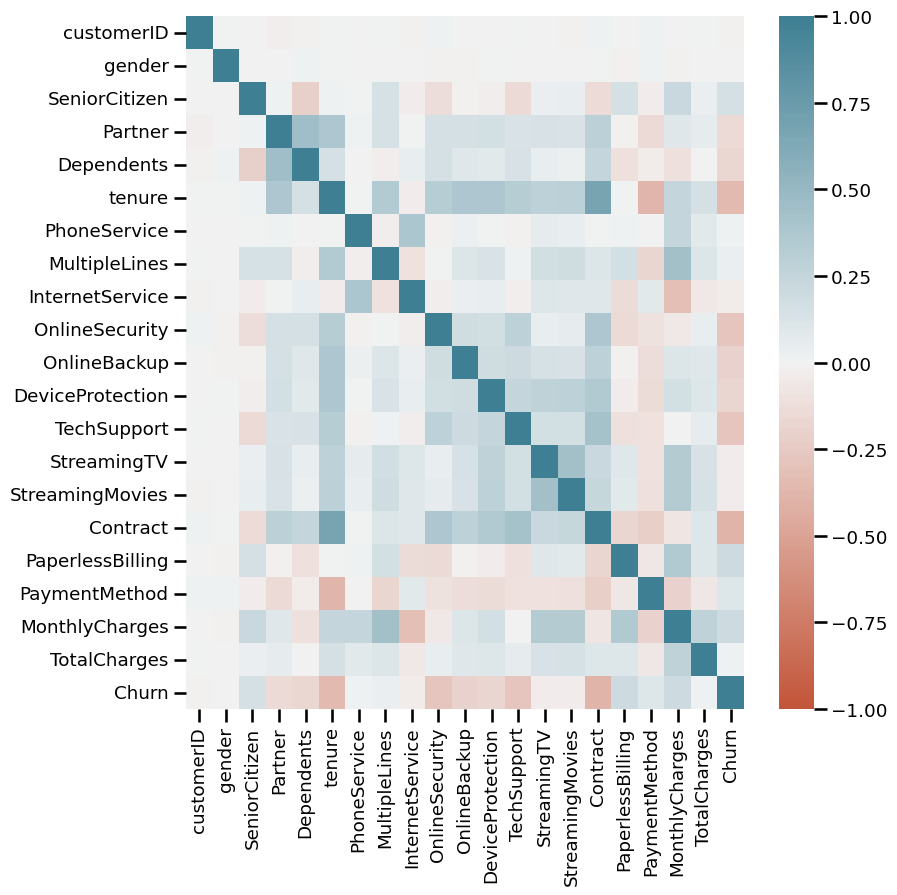

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(encdata.corr(), vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200))

<Axes: >

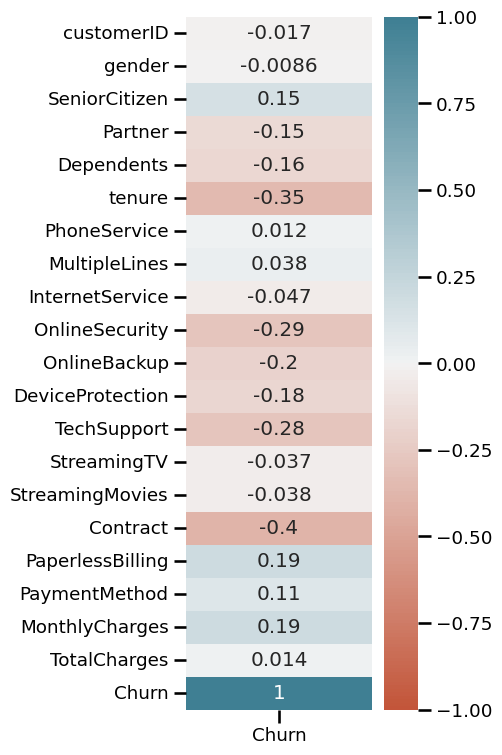

In [25]:
encadata2 = encdata.corr()
encadata2 = encadata2[['Churn']]
plt.figure(figsize=(3,9))
sns.heatmap(encadata2, annot = True, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200))